Firstly we shall import all the neccesary packages

In [40]:
 # import packages and alias
import numpy as np # data arrays
import pandas as pd # data structure and data analysis
import matplotlib as plt # data visualization
import datetime as dt # date time
import seaborn as sns
import matplotlib.pyplot as plt

Importing data set

In [41]:
# read_csv function to read the required CSV file
daily_activity = pd.read_csv("/content/Daily_activity_merged_data.csv")

To perform basic sanity check of the data to check null values if any

In [42]:
# preview first 10 rows with all columns
daily_activity.head(10)

,id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,day_of_week
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday
1,1624580081,4/12/2016,8163,5.31,5.31,0.0,0.00,0.00,5.31,0.0,0,0,146,1294,1432,Tuesday
2,1644430081,4/12/2016,10694,7.77,7.77,0.0,0.14,2.30,5.33,0.0,2,51,256,1131,3199,Tuesday
3,1844505072,4/12/2016,6697,4.43,4.43,0.0,0.00,0.00,4.43,0.0,0,0,339,1101,2030,Tuesday
4,1927972279,4/12/2016,678,0.47,0.47,0.0,0.00,0.00,0.47,0.0,0,0,55,734,2220,Tuesday
5,2022484408,4/12/2016,11875,8.34,8.34,0.0,3.31,0.77,4.26,0.0,42,14,227,1157,2390,Tuesday
6,2026352035,4/12/2016,4414,2.74,2.74,0.0,0.19,0.35,2.20,0.0,3,8,181,706,1459,Tuesday
7,2320127002,4/12/2016,10725,7.49,7.49,0.0,1.17,0.31,6.01,0.0,13,9,306,1112,2124,Tuesday
8,2347167796,4/12/2016,10113,6.83,6.83,0.0,2.00,0.62,4.20,0.0,28,13,320,964,2344,Tuesday
9,2873212765,4/12/2016,8796,5.91,5.91,0.0,0.11,0.93,4.88,0.0,2,21,356,1061,1982,Tuesday


Finding out whether there is any null or missing values in daily_activity

In [43]:
# obtain the # of missing data points per column
missing_values_count = daily_activity.isnull().sum()

# look at the # of missing points in all columns
missing_values_count[:]

,0
id,0
activity_date,0
total_steps,0
total_distance,0
tracker_distance,0
logged_activities_distance,0
very_active_distance,0
moderately_active_distance,0
light_active_distance,0
sedentary_active_distance,0


Finding Basic information like no. of columns and rows, type of value, etc.

In [44]:
# show basic information of data
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          940 non-null    int64  
 1   activity_date               940 non-null    object 
 2   total_steps                 940 non-null    int64  
 3   total_distance              940 non-null    float64
 4   tracker_distance            940 non-null    float64
 5   logged_activities_distance  940 non-null    float64
 6   very_active_distance        940 non-null    float64
 7   moderately_active_distance  940 non-null    float64
 8   light_active_distance       940 non-null    float64
 9   sedentary_active_distance   940 non-null    float64
 10  very_active_minutes         940 non-null    int64  
 11  fairly_active_minutes       940 non-null    int64  
 12  lightly_active_minutes      940 non-null    int64  
 13  sedentary_minutes           940 non

In [45]:
# count distinct value of "Id"
unique_id = len(pd.unique(daily_activity["id"]))

print("# of unique Id: " + str(unique_id))

# of unique Id: 33


Convert "ActivityDate" to datatime64 dtype and format to yyyy-mm-dd

In [46]:
daily_activity["activity_date"] = pd.to_datetime(daily_activity["activity_date"], format="%m/%d/%Y")

# re-print information to confirm
daily_activity.info()

# print the first 5 rows of "ActivityDate" to confirm
daily_activity["activity_date"].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          940 non-null    int64         
 1   activity_date               940 non-null    datetime64[ns]
 2   total_steps                 940 non-null    int64         
 3   total_distance              940 non-null    float64       
 4   tracker_distance            940 non-null    float64       
 5   logged_activities_distance  940 non-null    float64       
 6   very_active_distance        940 non-null    float64       
 7   moderately_active_distance  940 non-null    float64       
 8   light_active_distance       940 non-null    float64       
 9   sedentary_active_distance   940 non-null    float64       
 10  very_active_minutes         940 non-null    int64         
 11  fairly_active_minutes       940 non-null    int64         

,activity_date
0,2016-04-12
1,2016-04-12
2,2016-04-12
3,2016-04-12
4,2016-04-12


Creating new list with rearranged column names and renaming daily_activity to a shorter name df_activity.

In [47]:
#r create new list of rearranged columns
new_cols = ['id', 'activity_date', 'total_steps', 'total_distance', 'tracker_distance', 'logged_activities_distance', 'very_active_distance', 'moderately_active_distance', 'light_active_distance', 'sedentary_active_distance', 'very_active_minutes', 'fairly_active_minutes', 'lightly_active_minutes', 'sedentary_minutes', 'total_exercise_minutes', 'total_exercise_hours', 'calories', 'day_of_week']

# reindex function to rearrange columns based on "new_cols"
df_activity = daily_activity.reindex(columns=new_cols)

# print 1st 5 rows to confirm
df_activity.head(5)

,id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,total_exercise_minutes,total_exercise_hours,calories,day_of_week
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,NaN,NaN,1985,Tuesday
1,1624580081,2016-04-12,8163,5.31,5.31,0.0,0.00,0.00,5.31,0.0,0,0,146,1294,NaN,NaN,1432,Tuesday
2,1644430081,2016-04-12,10694,7.77,7.77,0.0,0.14,2.30,5.33,0.0,2,51,256,1131,NaN,NaN,3199,Tuesday
3,1844505072,2016-04-12,6697,4.43,4.43,0.0,0.00,0.00,4.43,0.0,0,0,339,1101,NaN,NaN,2030,Tuesday
4,1927972279,2016-04-12,678,0.47,0.47,0.0,0.00,0.00,0.47,0.0,0,0,55,734,NaN,NaN,2220,Tuesday


In [48]:
# rename columns
df_activity.rename(columns = {"activity_date":"date", "day_of_week":"day_of_the_week", "total_distance":"total_dist", "tracker_distance":"track_dist", "logged_activities_distance":"logged_dist", "very_active_distance":"very_active_dist", "moderately_active_distance":"moderate_active_dist", "light_active_distance":"light_active_dist", "sedentary_active_distance":"sedentary_active_dist", "very_active_minutes":"very_active_mins", "fairly_active_minutes":"fairly_active_mins", "lightly_active_minutes":"lightly_active_mins", "sedentary_minutes":"sedentary_mins", "total_exercise_minutes":"total_mins","total_exercise_hours":"total_hours"}, inplace = True)

# print column names to confirm
print(df_activity.columns.values)
df_activity.head()

['id' 'date' 'total_steps' 'total_dist' 'track_dist' 'logged_dist'
 'very_active_dist' 'moderate_active_dist' 'light_active_dist'
 'sedentary_active_dist' 'very_active_mins' 'fairly_active_mins'
 'lightly_active_mins' 'sedentary_mins' 'total_mins' 'total_hours'
 'calories' 'day_of_the_week']


,id,date,total_steps,total_dist,track_dist,logged_dist,very_active_dist,moderate_active_dist,light_active_dist,sedentary_active_dist,very_active_mins,fairly_active_mins,lightly_active_mins,sedentary_mins,total_mins,total_hours,calories,day_of_the_week
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,NaN,NaN,1985,Tuesday
1,1624580081,2016-04-12,8163,5.31,5.31,0.0,0.00,0.00,5.31,0.0,0,0,146,1294,NaN,NaN,1432,Tuesday
2,1644430081,2016-04-12,10694,7.77,7.77,0.0,0.14,2.30,5.33,0.0,2,51,256,1131,NaN,NaN,3199,Tuesday
3,1844505072,2016-04-12,6697,4.43,4.43,0.0,0.00,0.00,4.43,0.0,0,0,339,1101,NaN,NaN,2030,Tuesday
4,1927972279,2016-04-12,678,0.47,0.47,0.0,0.00,0.00,0.47,0.0,0,0,55,734,NaN,NaN,2220,Tuesday


Giving mathematical calcuations for total_mins

In [49]:
df_activity["total_mins"] = df_activity["very_active_mins"] + df_activity["fairly_active_mins"] + df_activity["lightly_active_mins"] + df_activity["sedentary_mins"]
df_activity["total_mins"].head(5)

,total_mins
0,1094
1,1440
2,1440
3,1440
4,789


Giving mathematical calcuations for total_mins

In [50]:
# create new column *total_hours* by converting to hour and round float to two decimal places
df_activity["total_hours"] = round(df_activity["total_mins"] / 60)

# print 1st 5 rows to confirm
df_activity["total_hours"].head(5)

,total_hours
0,18.0
1,24.0
2,24.0
3,24.0
4,13.0


Pulling general statistics

In [51]:
df_activity.describe()


,id,date,total_steps,total_dist,track_dist,logged_dist,very_active_dist,moderate_active_dist,light_active_dist,sedentary_active_dist,very_active_mins,fairly_active_mins,lightly_active_mins,sedentary_mins,total_mins,total_hours,calories
count,9.400000e+02,940,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,2016-04-26 06:53:37.021276672,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,1218.753191,20.313830,2303.609574
min,1.503960e+09,2016-04-12 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,2.320127e+09,2016-04-19 00:00:00,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,989.750000,16.000000,1828.500000
50%,4.445115e+09,2016-04-26 00:00:00,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,1440.000000,24.000000,2134.000000
75%,6.962181e+09,2016-05-04 00:00:00,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,1440.000000,24.000000,2793.250000
max,8.877689e+09,2016-05-12 00:00:00,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,1440.000000,24.000000,4900.000000
std,2.424805e+09,NaN,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,265.931767,4.437283,718.166862


**VISUALISATIONS**

VISUALISATION 1: NO. OF USERS LOGGED IN APP ACROSS THE WEEK

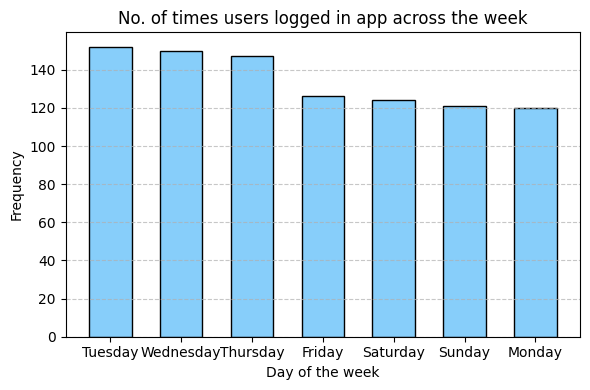

In [52]:
day_counts = df_activity.day_of_the_week.value_counts(sort=False)  # Get counts for each day of the week

# Plotting bar chart
plt.style.use("default")
plt.figure(figsize=(6, 4))  # Specify size of the chart
plt.bar(day_counts.index, day_counts.values, color="lightskyblue", edgecolor="black", width=0.6)

# Adding annotations and visuals
plt.xlabel("Day of the week")
plt.ylabel("Frequency")
plt.title("No. of times users logged in app across the week")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [53]:
data = pd.read_csv('/content/average_steps_day.csv')

# Calculate the median of the 'avg_steps' column and round off the value
median_steps = round(data['avg_steps'].median())

# Print the rounded result
print(f"The median of average steps (rounded) is: {median_steps}")


The median of average steps (rounded) is: 7559


In [54]:
data = pd.read_csv('/content/avg_calories_burned_day.csv')

# Calculate the median of the 'avg_steps' column and round off the value
median_calories = round(data['avg_calories'].median())

# Print the rounded result
print(f"The median calories (rounded) is: {median_calories}")

The median calories (rounded) is: 2324


VISUALISATION 2: CALORIES BURNED FOR EVERY STEP TAKEN

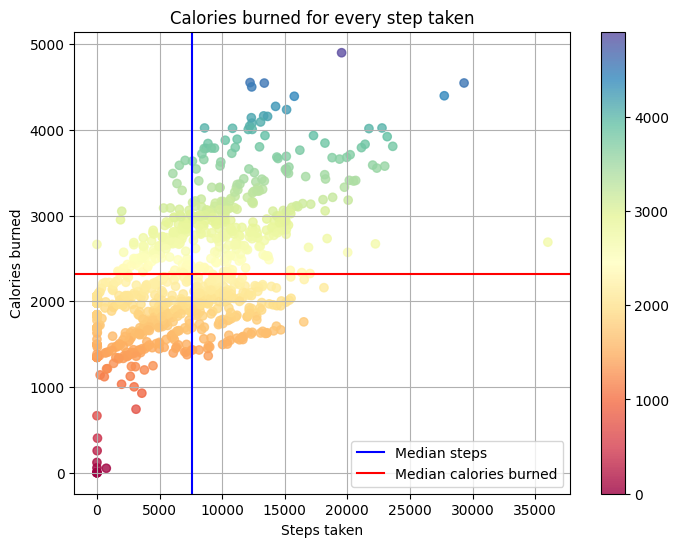

In [57]:
# plotting scatter plot
plt.style.use("default")
plt.figure(figsize=(8,6)) # specify size of the chart
plt.scatter(df_activity.total_steps, df_activity.calories,
            alpha = 0.8, c = df_activity.calories,
            cmap = "Spectral")

plt.colorbar(orientation = "vertical")
plt.axvline(median_steps, color = "Blue", label = "Median steps")
plt.axhline(median_calories, color = "Red", label = "Median calories burned")
plt.xlabel("Steps taken")
plt.ylabel("Calories burned")
plt.title("Calories burned for every step taken")
plt.grid(True)
plt.legend()
plt.show()

VISUALISATION 3: AVERAGE STEPS TAKEN ON EACH DAY OF THE WEEK

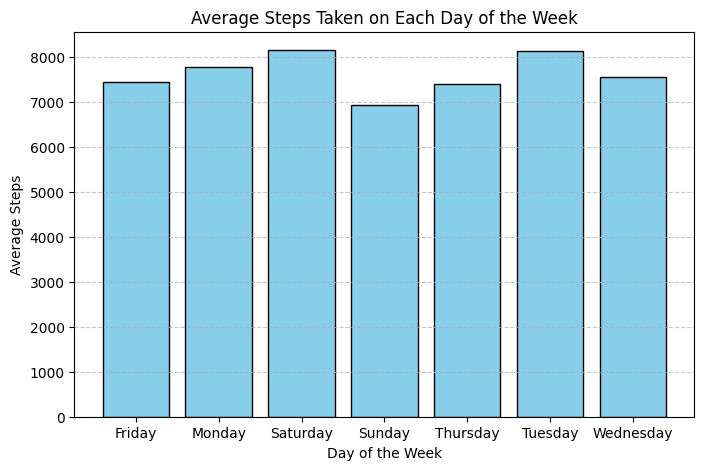

In [58]:
# Group data by day_of_the_week and calculate the average steps
steps_by_day = df_activity.groupby('day_of_the_week')['total_steps'].mean()

# Bar chart for average steps by day
plt.figure(figsize=(8, 5))
plt.bar(steps_by_day.index, steps_by_day.values, color='skyblue', edgecolor='black')
plt.xlabel('Day of the Week')
plt.ylabel('Average Steps')
plt.title('Average Steps Taken on Each Day of the Week')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

VISUALISATION 4: PROPOTION OF ACTIVITY LEVELS

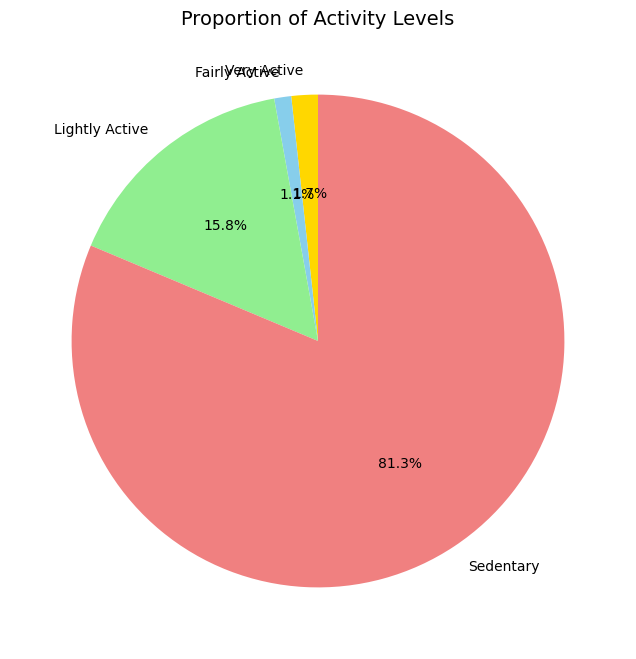


Analysis:
This pie chart highlights the time distribution across different activity levels. Most of the time is spent in sedentary behavior, followed by light activity. Very active and fairly active levels form a smaller share, pointing to areas for potential improvement.



In [59]:
percentage2_df = pd.read_csv("/content/percentage2.csv")
# Pie chart for activity levels
plt.figure(figsize=(8, 8))
plt.pie(percentage2_df['minutes'], labels=percentage2_df['lbls'], autopct='%1.1f%%', startangle=90, colors=['gold', 'skyblue', 'lightgreen', 'lightcoral'])
plt.title('Proportion of Activity Levels', fontsize=14)
plt.show()

print("""
Analysis:
This pie chart highlights the time distribution across different activity levels. Most of the time is spent in sedentary behavior, followed by light activity. Very active and fairly active levels form a smaller share, pointing to areas for potential improvement.
""")


VISUALISATION 5: Average Sedentary Minutes by Day of the Week

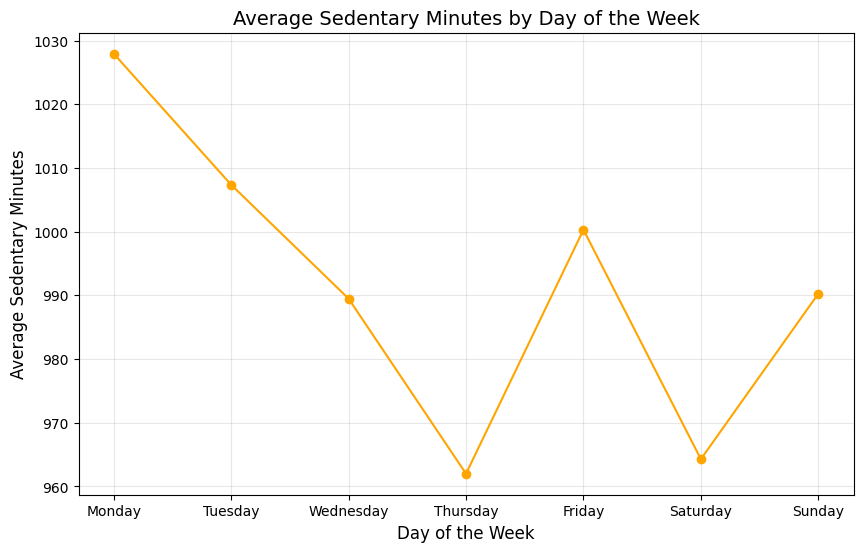


Analysis:
The line plot highlights sedentary trends throughout the week. For example, users may spend more sedentary time during weekdays due to work, while weekends show lower sedentary minutes.



In [60]:
avg_sedentary_by_day = df_activity.groupby('day_of_the_week')['sedentary_mins'].mean()
avg_sedentary_by_day = avg_sedentary_by_day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(10, 6))
plt.plot(avg_sedentary_by_day, marker='o', linestyle='-', color='orange')
plt.title('Average Sedentary Minutes by Day of the Week', fontsize=14)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Average Sedentary Minutes', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

print("""
Analysis:
The line plot highlights sedentary trends throughout the week. For example, users may spend more sedentary time during weekdays due to work, while weekends show lower sedentary minutes.
""")


VISUALISATION 6: AVERAGE INTENSITY RATIO DISTRBUTION

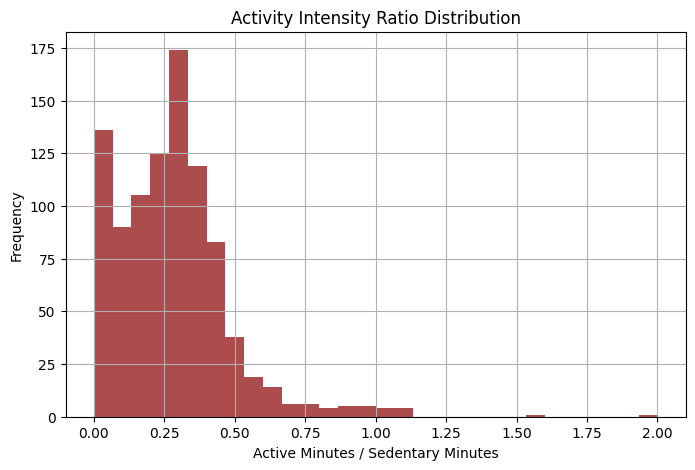

In [61]:
# Calculate activity intensity ratio safely
df_activity['activity_intensity_ratio'] = np.where(
    df_activity['sedentary_mins'] > 0,  # Avoid division by zero
    df_activity[['very_active_mins', 'fairly_active_mins', 'lightly_active_mins']].sum(axis=1)
    / df_activity['sedentary_mins'],
    np.nan  # Assign NaN where sedentary_minutes is zero
)
# Plot the distribution of activity intensity ratio
plt.figure(figsize=(8, 5))
plt.hist(df_activity['activity_intensity_ratio'].dropna(), bins=30, alpha=0.7, color='darkred')
plt.title('Activity Intensity Ratio Distribution')
plt.xlabel('Active Minutes / Sedentary Minutes')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

VISULAISATION 7: Correlation Heatmap

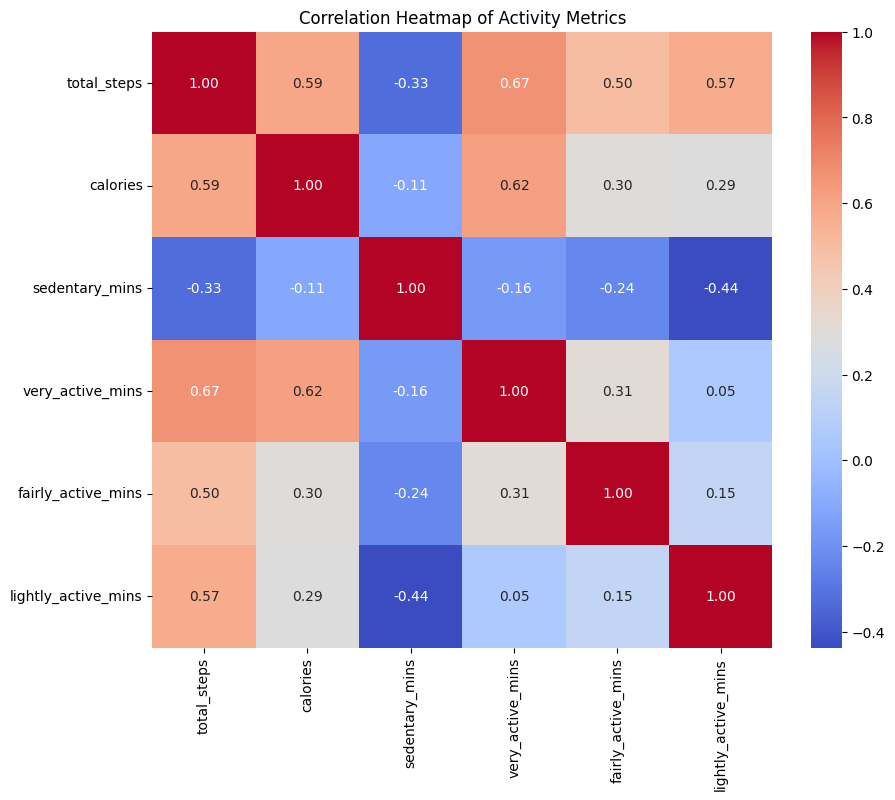

In [62]:
correlation_matrix = df_activity[['total_steps', 'calories', 'sedentary_mins',
                                           'very_active_mins', 'fairly_active_mins',
                                           'lightly_active_mins']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Heatmap of Activity Metrics')
plt.show()

VISUALISATION 9: Average Calories Burned by Day of the Week



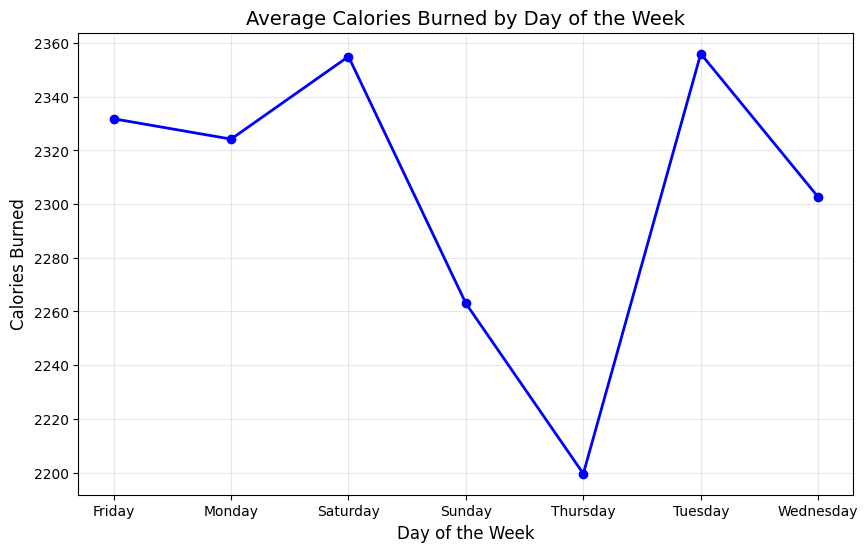


Analysis:
This line plot illustrates how calories burned vary by day. Peaks on certain days may correspond to increased activity, while dips indicate lower activity. Such patterns can guide lifestyle adjustments for more consistent calorie burning.



In [65]:
week_calories_df = pd.read_csv("/content/week_calories_df.csv")
# Average calories burned by day of the week
avg_calories = week_calories_df.groupby('day_of_week')['calories'].mean()

plt.figure(figsize=(10, 6))
avg_calories.sort_index().plot(marker='o', linestyle='-', color='blue', linewidth=2)
plt.title('Average Calories Burned by Day of the Week', fontsize=14)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Calories Burned', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

print("""
Analysis:
This line plot illustrates how calories burned vary by day. Peaks on certain days may correspond to increased activity, while dips indicate lower activity. Such patterns can guide lifestyle adjustments for more consistent calorie burning.
""")


VISUALISATION 9: Correlation Heatmap: Calories vs Steps

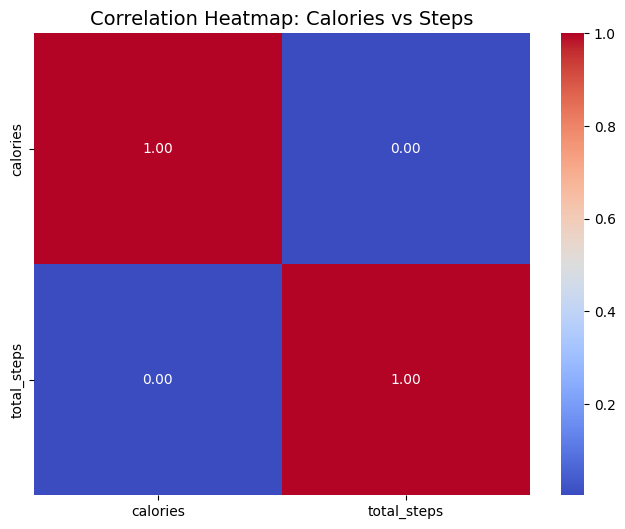


Analysis:
This heatmap reveals the correlation between total steps and calories burned. A strong positive correlation indicates that higher steps lead to greater calorie expenditure, aligning with expectations and validating the dataset.



In [64]:
week_steps_df = pd.read_csv("/content/week_steps_df.csv")
# Merging datasets for correlation analysis
merged_df = week_calories_df.merge(week_steps_df, on='day_of_week', how='inner')
correlation_matrix = merged_df[['calories', 'total_steps']].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Calories vs Steps', fontsize=14)
plt.show()

print("""
Analysis:
This heatmap reveals the correlation between total steps and calories burned. A strong positive correlation indicates that higher steps lead to greater calorie expenditure, aligning with expectations and validating the dataset.
""")
